In [ ]:
!pip show duckdb

In [ ]:
!pip install duckdb jupysql pandas matplotlib duckdb-engine

# Connecting to DuckDB Natively

使用python初始化 duckdb 连接，然后赋值给 jupysql 上下文。

1.duckdb原生初始化方法

```ipython
import duckdb
import pandas as pd

%load_ext sql
conn = duckdb.connect()
%sql conn --alias duckdb
```

2.duckdb sqlalchemy 风格的初始化方法.

```ipython
%sql duckdb:///my_ch03.db --alias ch03
```

In [9]:
# 使用duckdb sqlalchemy 风格的初始化方法.
%load_ext sql
%sql duckdb:///my_ch03.db --alias ch03

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Connecting to 'ch03'

In [ ]:
# 关闭数据库连接连接
#%sql -x duckdb:///my_ch03.db

In [5]:
%sql --connections

current,url,alias
*,duckdb:///my_ch03.db,ch03


关闭 alias 对应的数据库连接
```ipython
%sql -x duckdb
```

In [6]:
%%sql
SELECT
    schema_name,
    function_name
FROM duckdb_functions()
ORDER BY ALL DESC
LIMIT 5;

Running query in 'ch03'

schema_name,function_name
pg_catalog,shobj_description
pg_catalog,shobj_description
pg_catalog,shobj_description
pg_catalog,pg_typeof
pg_catalog,pg_typeof


In [ ]:
%%sql
SELECT *
FROM duckdb_extensions();

In [ ]:
%%sql
import database 'ch03/ch03_db'

In [10]:
%%sql
select database_name,table_name,sql  from duckdb_tables;

Running query in 'ch03'

database_name,table_name,sql
my_ch03,prices,"CREATE TABLE prices(id INTEGER DEFAULT(nextval('prices_id')) PRIMARY KEY, ""value"" DECIMAL(5,2) NOT NULL, valid_from DATE NOT NULL, valid_until DATE, UNIQUE(valid_from));"
my_ch03,readings,"CREATE TABLE readings(system_id INTEGER, read_on TIMESTAMP, power DECIMAL(10,3) DEFAULT(0) NOT NULL, CHECK((power >= 0)), PRIMARY KEY(system_id, read_on), FOREIGN KEY (system_id) REFERENCES systems(id));"
my_ch03,systems,"CREATE TABLE systems(id INTEGER PRIMARY KEY, ""name"" VARCHAR NOT NULL);"


In [11]:
%%sql
select database_name,view_name,sql from duckdb_views;

Running query in 'ch03'

database_name,view_name,sql
my_ch03,v_power_per_day,"CREATE VIEW v_power_per_day AS SELECT system_id, date_trunc('day', read_on) AS ""day"", round(((sum(power) / 4) / 1000), 2) AS kWh FROM readings GROUP BY system_id, ""day"";"


# query

https://medium.com/@ilakk2023/advanced-sql-features-in-duckdb-window-functions-common-table-expressions-and-more-bbf9c4216986  
https://www.cpard.xyz/posts/sql_window_functions_tutorial/  
https://stackoverflow.com/questions/78098523/how-to-calculate-a-conditional-rolling-count-by-group-comparing-to-current-row  
https://www.datacamp.com/tutorial/building-ai-projects-with-duckdb  


数据集  
https://archive.ics.uci.edu/dataset/222/bank+marketing  
https://archive.ics.uci.edu/datasets?skip=10&take=10&sort=desc&orderBy=NumHits&search=  
https://www.kaggle.com/datasets?topic=trendingDataset  

In [19]:
%sql output_df << select * from systems;

Running query in 'ch03'

In [20]:
output_df

id,name
2,Residential 1a
3,Residential 1b
4,[4] NREL x-Si -1
10,[10] NREL CIS -1
33,Silicor Materials
34,[34] Andre Agassi Preparatory Academy - Building A
35,[35] Andre Agassi Preparatory Academy - Gymnasium
36,[36] NREL low-X x-Si -1
50,NREL x-Si 6
51,NREL x-Si 7


In [21]:
type(output_df)

sql.run.resultset.ResultSet

In [13]:
%sql select * from systems;

Running query in 'ch03'

id,name
2,Residential 1a
3,Residential 1b
4,[4] NREL x-Si -1
10,[10] NREL CIS -1
33,Silicor Materials
34,[34] Andre Agassi Preparatory Academy - Building A
35,[35] Andre Agassi Preparatory Academy - Gymnasium
36,[36] NREL low-X x-Si -1
50,NREL x-Si 6
51,NREL x-Si 7


In [157]:
%sql select * from readings;

Running query in 'ch03'

system_id,read_on,power
34,2019-01-01 00:00:00,0.000
34,2019-01-01 00:15:00,0.000
34,2019-01-01 00:30:00,0.000
34,2019-01-01 00:45:00,0.000
34,2019-01-01 01:00:00,0.000
34,2019-01-01 01:15:00,0.000
34,2019-01-01 01:30:00,0.000
34,2019-01-01 01:45:00,0.000
34,2019-01-01 02:00:00,0.000
34,2019-01-01 02:15:00,0.000


In [158]:
%sql select count(*) from readings;

Running query in 'ch03'

count_star()
151879


In [159]:
%sql select * from prices;

Running query in 'ch03'

id,value,valid_from,valid_until
1,11.59,2018-12-01,2019-01-01
10,11.47,2019-01-01,2019-02-01
11,11.35,2019-02-01,2019-03-01
12,11.23,2019-03-01,2019-04-01
13,11.11,2019-04-01,2019-05-01
14,10.95,2019-05-01,2019-06-01
15,8.60,2020-11-01,2023-01-01
16,8.60,2023-01-01,2024-02-01
17,8.64,2020-10-01,2020-11-01
18,8.77,2020-09-01,2020-10-01


In [160]:
%sql select * from v_power_per_day;

Running query in 'ch03'

system_id,day,kWh
34,2019-01-01,471.4
34,2019-01-02,458.58
34,2019-01-03,443.65
34,2019-01-04,445.03
34,2019-01-05,111.3
34,2019-01-06,381.5
34,2019-01-07,144.18
34,2019-01-08,345.08
34,2019-01-09,443.33
34,2019-01-10,437.75


## Summarizing data

In [ ]:
%sql SUMMARIZE systems;

In [162]:
%sql SUMMARIZE readings;

Running query in 'ch03'

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
system_id,INTEGER,10,1200,3,426.21980655653516,558.9929308220753,10,34,1200,151879,0.00
read_on,TIMESTAMP,2019-01-01 00:00:00,2020-06-26 11:00:00,51371,None,None,None,None,None,151879,0.00
power,"DECIMAL(10,3)",0.000,133900.000,29090,10580.085858749399,23390.32674662438,0,20,5136,151879,0.00


In [163]:
%sql SUMMARIZE prices;

Running query in 'ch03'

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
id,INTEGER,1,33,25,20.68,8.045288476286396,15,21,27,25,0.00
value,"DECIMAL(5,2)",8.60,11.59,24,9.9916,0.9739852839408476,9,10,11,25,0.00
valid_from,DATE,2018-12-01,2023-01-01,25,None,None,None,None,None,25,0.00
valid_until,DATE,2019-01-01,2024-02-01,25,None,None,None,None,None,25,0.00


In [164]:
%sql SUMMARIZE v_power_per_day;

Running query in 'ch03'

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
system_id,INTEGER,10,1200,3,425.3761814744802,558.9116712455686,10,34,1200,1587,0.00
day,DATE,2019-01-01,2020-06-26,542,None,None,None,None,None,1587,0.00
kWh,DOUBLE,0.0,960.03,1379,253.13437933207288,285.4440131658868,5.628010204081632,167.8637239583333,409.03701388888885,1587,0.00


In [165]:
%sql SUMMARIZE SELECT read_on, power FROM readings WHERE system_id = 1200;

Running query in 'ch03'

column_name,column_type,min,max,approx_unique,avg,std,q25,q50,q75,count,null_percentage
read_on,TIMESTAMP,2019-01-01 00:00:00,2020-06-26 11:00:00,50833,None,None,None,None,None,52072,0.00
power,"DECIMAL(10,3)",0.000,47873.333,6438,7122.5597121293595,11760.089219586589,20,21,9541,52072,0.00


## 条件过滤(Conditions and filtering outside the WHERE clause)

Table 4.1 Filtering clauses and where to use them  
         Where to use it Effect  
HAVING    After GROUP BY Filters rows based on aggregates com-
puted for a group  
QUALIFY   After the FROM clause referring to any win-
dow expression Filters rows based on anything computed
in that window  
FILTER    After any aggregate function Filters the values passed to the aggregate

### HAVING

In [166]:
%%sql 
SELECT system_id,
date_trunc('day', read_on) AS day,
round(sum(power) / 4 / 1000, 2) AS kWh,
FROM readings
WHERE kWh >= 900
GROUP BY ALL;

Running query in 'ch03'

RuntimeError: (duckdb.duckdb.BinderException) Binder Error: WHERE clause cannot contain aggregates!
LINE 3: round(sum(power) / 4 / 1000, 2) AS kWh,
              ^
[SQL: SELECT system_id,
date_trunc('day', read_on) AS day,
round(sum(power) / 4 / 1000, 2) AS kWh,
FROM readings
WHERE kWh >= 900
GROUP BY ALL;]
(Background on this error at: https://sqlalche.me/e/20/f405)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [167]:
%%sql 
SELECT system_id,
date_trunc('day', read_on) AS day,
round(sum(power) / 4 / 1000, 2) AS kWh,
FROM readings
GROUP BY ALL
HAVING kWh >= 900
ORDER BY kWh DESC;

Running query in 'ch03'

system_id,day,kWh
34,2020-05-12,960.03
34,2020-06-08,935.33
34,2020-05-23,924.08
34,2019-06-09,915.4
34,2020-06-06,914.98
34,2020-05-20,912.65
34,2019-05-01,912.6
34,2020-06-16,911.93
34,2020-06-07,911.73
34,2020-05-18,907.98


### QUALIFY

However, you also can’t use HAVING because window functions get evaluated
before an aggregation. So QUALIFY lets you filter on the results of a window function.

In [191]:
%%sql SELECT dense_rank() OVER (ORDER BY power DESC) AS rnk, *
FROM readings
QUALIFY rnk <= 3;

Running query in 'ch03'

rnk,system_id,read_on,power
1,34,2019-05-08 12:15:00,133900.000
1,34,2019-05-23 10:00:00,133900.000
1,34,2019-05-23 11:30:00,133900.000
1,34,2019-05-28 11:45:00,133900.000
1,34,2020-04-02 11:30:00,133900.000
2,34,2019-05-09 10:30:00,133700.000
2,34,2019-05-10 12:15:00,133700.000
3,34,2019-03-21 13:00:00,133600.000
3,34,2019-04-02 10:30:00,133600.000


In [ ]:
%%sql 
SELECT 
system_id,
    day,
    avg(kWh) OVER (
    PARTITION BY system_id
    ORDER BY day ASC
    RANGE BETWEEN INTERVAL 3 Days PRECEDING
    AND INTERVAL 3 Days FOLLOWING
    ) AS "kWh 7-day moving average"
FROM v_power_per_day
QUALIFY "kWh 7-day moving average" > 875
ORDER BY system_id, day;

### FILTER

In [ ]:
%%sql
select 
    system_id, 
    count(*) filter(read_on <'2019-01-01 01:00:00') as cond_count,
    max(read_on) filter(read_on <'2019-01-01 02:00:00') as max_read_on,
    min(read_on) filter(read_on <'2019-01-01 03:00:00') as min_read_on,
from readings group by system_id;

## subquery

子查询的本质是聚合计算无法支持嵌套。如下计算所示

In [172]:
%sql SELECT avg(sum(kWh)) FROM v_power_per_day;

Running query in 'ch03'

RuntimeError: (duckdb.duckdb.BinderException) Binder Error: aggregate function calls cannot be nested
LINE 1: SELECT avg(sum(kWh)) FROM v_power_per_day;
                   ^
[SQL: SELECT avg(sum(kWh)) FROM v_power_per_day;]
(Background on this error at: https://sqlalche.me/e/20/f405)
If you need help solving this issue, send us a message: https://ploomber.io/community


In [170]:
%sql SELECT system_id,avg(sum(kWh)) FROM v_power_per_day GROUP BY system_id；

Running query in 'ch03'

RuntimeError: If using snippets, you may pass the --with argument explicitly.
For more details please refer: https://jupysql.ploomber.io/en/latest/compose.html#with-argument


Original error message from DB driver:
(duckdb.duckdb.BinderException) Binder Error: Referenced column "system_id；" not found in FROM clause!
Candidate bindings: "v_power_per_day.system_id"
LINE 1: ...um(kWh)) FROM v_power_per_day GROUP BY system_id；
                                                  ^
[SQL: SELECT system_id,avg(sum(kWh)) FROM v_power_per_day GROUP BY system_id；]
(Background on this error at: https://sqlalche.me/e/20/f405)

If you need help solving this issue, send us a message: https://ploomber.io/community


### uncorrelated subquery

In [173]:
%%sql
SELECT avg(sum_per_system)
FROM (
SELECT sum(kWh) AS sum_per_system
FROM v_power_per_day
GROUP BY system_id
);

Running query in 'ch03'

avg(sum_per_system)
133908.08666666664


In [174]:
%%sql SELECT read_on, power
FROM readings
WHERE power = (SELECT max(power) FROM readings);

Running query in 'ch03'

read_on,power
2019-05-08 12:15:00,133900.000
2019-05-23 10:00:00,133900.000
2019-05-23 11:30:00,133900.000
2019-05-28 11:45:00,133900.000
2020-04-02 11:30:00,133900.000


### correlated subquery

In [175]:
%%sql SELECT system_id, read_on, power
FROM readings r1
WHERE power = (
SELECT max(power)
FROM readings r2
WHERE r2.system_id = r1.system_id
)
ORDER BY ALL;

Running query in 'ch03'

system_id,read_on,power
10,2019-02-23 12:45:00,1109.293
34,2019-05-08 12:15:00,133900.000
34,2019-05-23 10:00:00,133900.000
34,2019-05-23 11:30:00,133900.000
34,2019-05-28 11:45:00,133900.000
34,2020-04-02 11:30:00,133900.000
1200,2020-04-16 12:15:00,47873.333


这种子查询关联外部表的查询非常复杂，在其他数据库中，经常需要被优化为先执行max运算，然后把max的结果作为子查询关联到外部表。  
简单来讲就是把关联子查询改写为不需要关联的两个表的(子查询需要单独聚合) join 连接。  
查询结果如下所示:  

In [176]:
%%sql SELECT r1.system_id, read_on, power
FROM readings r1
JOIN (
SELECT r2.system_id, max(power) AS value
FROM readings r2
GROUP BY ALL
) AS max_power ON (
max_power.system_id = r1.system_id AND
max_power.value = r1.power
)
ORDER BY ALL;

Running query in 'ch03'

system_id,read_on,power
10,2019-02-23 12:45:00,1109.293
34,2019-05-08 12:15:00,133900.000
34,2019-05-23 10:00:00,133900.000
34,2019-05-23 11:30:00,133900.000
34,2019-05-28 11:45:00,133900.000
34,2020-04-02 11:30:00,133900.000
1200,2020-04-16 12:15:00,47873.333


In [178]:
%%sql 
EXPLAIN SELECT r1.system_id, read_on, power
FROM readings r1
JOIN (
SELECT r2.system_id, max(power) AS value
FROM readings r2
GROUP BY ALL
) AS max_power ON (
max_power.system_id = r1.system_id AND
max_power.value = r1.power
)
ORDER BY ALL;

Running query in 'ch03'

explain_key,explain_value


### Subqueries as expressions

In [179]:

%%sql SELECT * FROM VALUES (7), (11) s(v)
WHERE EXISTS (SELECT * FROM range(10) WHERE range = v);

Running query in 'ch03'

v
7


In [180]:

%%sql SELECT * FROM VALUES (7), (11) s(v)
WHERE v IN (SELECT * FROM range(10));

Running query in 'ch03'

v
7


In [181]:

%%sql SELECT * FROM VALUES (7), (11) s(v)
WHERE v <= ANY (SELECT * FROM range(10));

Running query in 'ch03'

v
7


In [182]:

%%sql SELECT * FROM VALUES (7), (11) s(v)
WHERE v = ALL (SELECT 7);

Running query in 'ch03'

v
7


## drill-down report

### Grouping sets

In [183]:
%%sql SELECT count(*),
min(power) AS min_W, max(power) AS max_W,
round(sum(power) / 4 / 1000, 2) AS kWh
FROM readings;

Running query in 'ch03'

count_star(),min_W,max_W,kWh
151879,0.000,133900.000,401723.22


使用分组聚合来进行分组维度的数据聚合

In [ ]:
%%sql SELECT year(read_on) AS year,
system_id,
count(*),
round(sum(power) / 4 / 1000, 2) AS kWh
FROM readings
GROUP BY year, system_id
ORDER BY year, system_id;

使用 GROUPING SETS 进行分组下钻;

In [184]:
%%sql SELECT year(read_on) AS year,
system_id,
count(*),
round(sum(power) / 4 / 1000, 2) AS kWh
FROM readings
GROUP BY GROUPING SETS ((year, system_id), year, ())
ORDER BY year NULLS FIRST, system_id NULLS FIRST;

Running query in 'ch03'

year,system_id,count_star(),kWh
None,None,151879,401723.22
2019,None,103621,269303.39
2019,10,33544,1549.34
2019,34,35040,205741.9
2019,1200,35037,62012.15
2020,None,48258,132419.83
2020,10,14206,677.14
2020,34,17017,101033.35
2020,1200,17035,30709.34


### ROLLUP

In [185]:
%%sql SELECT year(read_on) AS year,
system_id,
count(*),
round(sum(power) / 4 / 1000, 2) AS kWh
FROM readings
GROUP BY ROLLUP (year, system_id)
ORDER BY year NULLS FIRST, system_id NULLS FIRST;

Running query in 'ch03'

year,system_id,count_star(),kWh
None,None,151879,401723.22
2019,None,103621,269303.39
2019,10,33544,1549.34
2019,34,35040,205741.9
2019,1200,35037,62012.15
2020,None,48258,132419.83
2020,10,14206,677.14
2020,34,17017,101033.35
2020,1200,17035,30709.34


### CUBE

In [186]:
%%sql SELECT year(read_on) AS year,
system_id,
count(*),
round(sum(power) / 4 / 1000, 2) AS kWh
FROM readings
GROUP BY CUBE (year, system_id)
ORDER BY year NULLS FIRST, system_id NULLS FIRST;

Running query in 'ch03'

year,system_id,count_star(),kWh
None,None,151879,401723.22
None,10,47750,2226.48
None,34,52057,306775.25
None,1200,52072,92721.48
2019,None,103621,269303.39
2019,10,33544,1549.34
2019,34,35040,205741.9
2019,1200,35037,62012.15
2020,None,48258,132419.83
2020,10,14206,677.14


## Window functions

https://www.sqlitetutorial.net/sqlite-window-functions/sqlite-rank/  
https://www.sqlitetutorial.net/sqlite-window-functions/  
https://github.com/royalosyin/Practice-SQL-with-SQLite-and-Jupyter-Notebook/tree/master  
https://medium.com/@dataproducts/advanced-sql-an-introduction-to-window-function-6f75b1fb3318  
https://highperformancesqlite.com/watch/window-functions  

https://www.geeksforgeeks.org/window-functions-in-sql/  

https://mode.com/blog/most-popular-window-functions-and-how-to-use-them?utm_medium=referral&utm_source=mode-site&utm_campaign=sql-tutorial  

https://mode.com/sql-tutorial/sql-window-functions  
https://www.freecodecamp.org/news/window-functions-in-sql/  
https://www.freecodecamp.org/news/  
https://www.datacamp.com/cheat-sheet/sql-window-functions-cheat-sheet  


![](https://images.datacamp.com/image/upload/v1713890725/Marketing/Blog/SQL_Window_Functions_1_1.pdf)

In [187]:
%sql SELECT * FROM readings ORDER BY power DESC LIMIT 3;

Running query in 'ch03'

Deploy Flask apps for free on Ploomber Cloud! Learn more: https://ploomber.io/s/signup


system_id,read_on,power
34,2019-05-08 12:15:00,133900.000
34,2019-05-23 10:00:00,133900.000
34,2019-05-23 11:30:00,133900.000


In [189]:
%%sql
WITH ranked_readings AS (
SELECT *,
dense_rank()
OVER (ORDER BY power DESC) AS rnk,
    rank()
OVER (ORDER BY power DESC) AS rnk
FROM readings
)
SELECT *
FROM ranked_readings
WHERE rnk <= 3;

Running query in 'ch03'

system_id,read_on,power,rnk,rnk_1
34,2019-05-08 12:15:00,133900.000,1,1
34,2019-05-23 10:00:00,133900.000,1,1
34,2019-05-23 11:30:00,133900.000,1,1
34,2019-05-28 11:45:00,133900.000,1,1
34,2020-04-02 11:30:00,133900.000,1,1
34,2019-05-09 10:30:00,133700.000,2,6
34,2019-05-10 12:15:00,133700.000,2,6
34,2019-03-21 13:00:00,133600.000,3,8
34,2019-04-02 10:30:00,133600.000,3,8


### partition

In [190]:
%%sql

WITH ranked_readings AS (
SELECT *,
dense_rank()
OVER (
PARTITION BY system_id
ORDER BY power DESC
) AS rnk
FROM readings
)
SELECT * FROM ranked_readings WHERE rnk <= 2
ORDER BY system_id, rnk ASC;

Running query in 'ch03'

system_id,read_on,power,rnk
10,2019-02-23 12:45:00,1109.293,1
10,2019-03-01 12:15:00,1087.900,2
34,2019-05-08 12:15:00,133900.000,1
34,2019-05-23 10:00:00,133900.000,1
34,2019-05-23 11:30:00,133900.000,1
34,2019-05-28 11:45:00,133900.000,1
34,2020-04-02 11:30:00,133900.000,1
34,2019-05-09 10:30:00,133700.000,2
34,2019-05-10 12:15:00,133700.000,2
1200,2020-04-16 12:15:00,47873.333,1


In [ ]:
%%sql

SELECT *,
avg(kWh)
OVER (
PARTITION BY system_id
) AS average_per_system
FROM v_power_per_day;

### aggregation(rank, agg)

### frame

#### range between

In [ ]:
%%sql 
SELECT system_id,
day,
kWh,
avg(kWh) OVER (
PARTITION BY system_id
ORDER BY day ASC
RANGE BETWEEN INTERVAL 3 Days PRECEDING
AND INTERVAL 3 Days FOLLOWING
) AS "kWh 7-day moving average"
FROM v_power_per_day
ORDER BY system_id, day;

#### rows between

### named window

In [192]:
%%sql SELECT system_id,
day,
min(kWh) OVER seven_days AS "7-day min",
quantile(kWh, [0.25, 0.5, 0.75])
OVER seven_days AS "kWh 7-day quartile",
max(kWh) OVER seven_days AS "7-day max",
FROM v_power_per_day
WINDOW
seven_days AS (
PARTITION BY system_id, month(day)
ORDER BY day ASC
RANGE BETWEEN INTERVAL 3 Days PRECEDING
AND INTERVAL 3 Days FOLLOWING
)
ORDER BY system_id, day;

Running query in 'ch03'

system_id,day,7-day min,kWh 7-day quartile,7-day max
10,2019-01-01,2.19,"[2.19, 5.37, 5.55]",5.72
10,2019-01-02,2.19,"[4.62, 5.37, 5.55]",5.72
10,2019-01-03,2.19,"[3.69, 4.62, 5.55]",5.72
10,2019-01-04,2.19,"[3.69, 5.37, 5.72]",5.81
10,2019-01-05,3.69,"[4.62, 5.37, 5.72]",5.81
10,2019-01-06,3.52,"[3.69, 5.32, 5.72]",5.81
10,2019-01-07,3.46,"[3.52, 4.62, 5.37]",5.81
10,2019-01-08,0.28,"[3.46, 3.69, 5.32]",5.81
10,2019-01-09,0.28,"[1.58, 3.52, 5.32]",5.81
10,2019-01-10,0.28,"[1.58, 3.52, 5.81]",5.9


### lag and lead

In [193]:
%%sql 
SELECT valid_from,
value,
lag(value)
OVER validity AS "Previous value",
value - lag(value, 1, value)
OVER validity AS Change
FROM prices
WHERE date_part('year', valid_from) = 2019
WINDOW validity AS (ORDER BY valid_from)
ORDER BY valid_from;

Running query in 'ch03'

valid_from,value,Previous value,Change
2019-01-01,11.47,None,0.00
2019-02-01,11.35,11.47,-0.12
2019-03-01,11.23,11.35,-0.12
2019-04-01,11.11,11.23,-0.12
2019-05-01,10.95,11.11,-0.16
2019-06-01,10.79,10.95,-0.16
2019-07-01,10.64,10.79,-0.15
2019-08-01,10.48,10.64,-0.16
2019-09-01,10.33,10.48,-0.15
2019-10-01,10.18,10.33,-0.15


In [194]:
%%sql

WITH changes AS (
SELECT value - lag(value, 1, value) OVER (ORDER BY valid_from) AS v
FROM prices
WHERE date_part('year', valid_from) = 2019
ORDER BY valid_from
)
SELECT sum(changes.v) AS total_change FROM changes;

Running query in 'ch03'

total_change
-1.50


In [195]:
%%sql 
WITH changes AS (
SELECT value - lag(value, 1, value) OVER (ORDER BY valid_from) AS v
FROM prices
WHERE date_part('year', valid_from) = 2019
ORDER BY valid_from
)
SELECT * FROM changes;

Running query in 'ch03'

v
0.00
-0.12
-0.12
-0.12
-0.16
-0.16
-0.15
-0.16
-0.15
-0.15


## Transpose Rows and Columns

In [196]:
%%sql
SELECT system_id, year(day), sum(kWh) FROM v_power_per_day GROUP BY ALL ORDER
BY system_id;

Running query in 'ch03'

system_id,"year(""day"")",sum(kWh)
10,2019,1549.2800000000004
10,2020,677.19
34,2019,205742.6000000001
34,2020,101033.75
1200,2019,62012.10999999994
1200,2020,30709.330000000005


### pivot

https://duckdb.org/docs/sql/statements/pivot  

```sql
PIVOT ⟨dataset⟩
ON ⟨columns⟩
USING ⟨values⟩
GROUP BY ⟨rows⟩
ORDER BY ⟨columns_with_order_directions⟩
LIMIT ⟨number_of_rows⟩;
```

In [197]:
%%sql
SELECT system_id,
sum(kWh) FILTER (WHERE year(day) = 2019)
AS 'kWh in 2019',
sum(kWh) FILTER (WHERE year(day) = 2020)
AS 'kWh in 2020'
FROM v_power_per_day
GROUP BY system_id;

Running query in 'ch03'

system_id,kWh in 2019,kWh in 2020
10,1549.2800000000004,677.19
34,205742.6000000001,101033.75
1200,62012.10999999994,30709.330000000005


In [198]:
%sql PIVOT (FROM v_power_per_day) ON year(day) USING sum(kWh);

Running query in 'ch03'

system_id,2019,2020


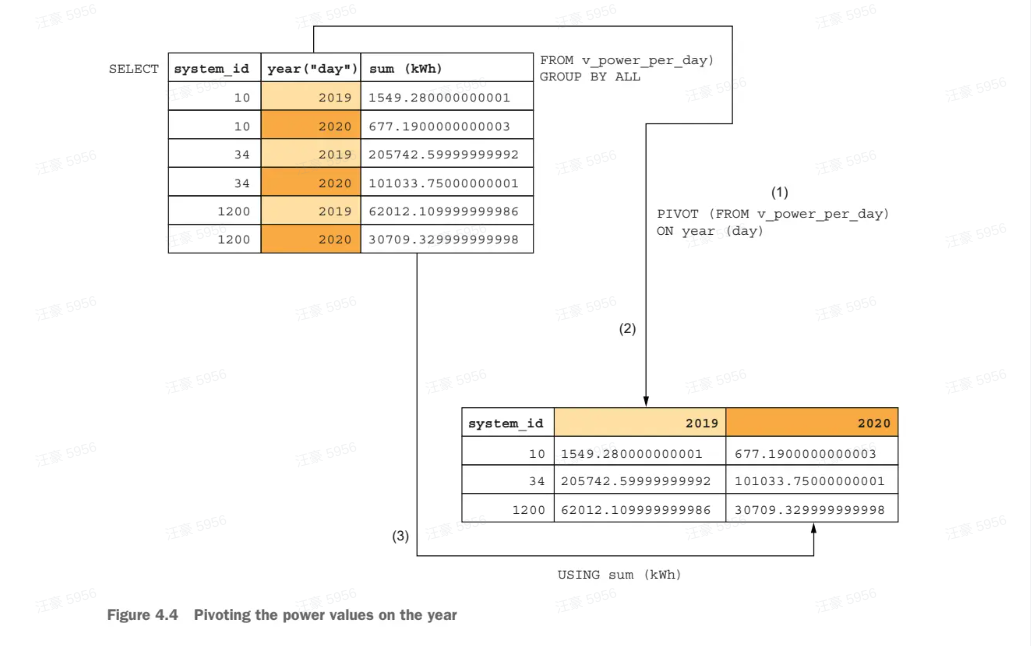

In [ ]:
%%sql
PIVOT v_power_per_day
ON year(day)
USING sum(kWh) AS total, max(kWh) AS best_day;

In [ ]:
%%sql
PIVOT (FROM v_power_per_day WHERE day BETWEEN '2020-05-30' AND '2020-06-02')
ON DAY USING first(kWh);

### unpivot

https://duckdb.org/docs/sql/statements/unpivot  

```sql
UNPIVOT ⟨dataset⟩
ON ⟨column(s)⟩
INTO
    NAME ⟨name-column-name⟩
    VALUE ⟨value-column-name(s)⟩
ORDER BY ⟨column(s)-with-order-direction(s)⟩
LIMIT ⟨number-of-rows⟩;
```

## ASOF JOIN

A common operation when working with temporal or similarly-ordered data is to find the nearest (first) event in a reference table (such as prices). This is called an as-of join:  

https://duckdb.org/docs/guides/sql_features/asof_join.html  
https://duckdb.org/2023/09/15/asof-joins-fuzzy-temporal-lookups.html  



In [199]:
%%sql 
SELECT 
 range AS valid_at,
 random()*10 AS price
 FROM range('2023-01-01 01:00:00'::timestamp,'2023-01-01 02:00:00'::timestamp, INTERVAL '15 minutes')

Running query in 'ch03'

valid_at,price
2023-01-01 01:00:00,0.6845937063917518
2023-01-01 01:15:00,0.8275592676363885
2023-01-01 01:30:00,4.767876039259136
2023-01-01 01:45:00,9.930175710469484


In [200]:
%%sql 
SELECT range AS sold_at,
 random()*10 AS num
 FROM range('2023-01-01 01:00:00'::timestamp,'2023-01-01 02:00:00'::timestamp, INTERVAL '5 minutes')

Running query in 'ch03'

sold_at,num
2023-01-01 01:00:00,2.2193160536698997
2023-01-01 01:05:00,2.887662756256759
2023-01-01 01:10:00,0.4709558514878154
2023-01-01 01:15:00,9.567802103701979
2023-01-01 01:20:00,5.263633127324283
2023-01-01 01:25:00,1.7122158058919013
2023-01-01 01:30:00,6.541664809919894
2023-01-01 01:35:00,8.631342453882098
2023-01-01 01:40:00,9.315414181910455
2023-01-01 01:45:00,0.04263599403202534


inner join

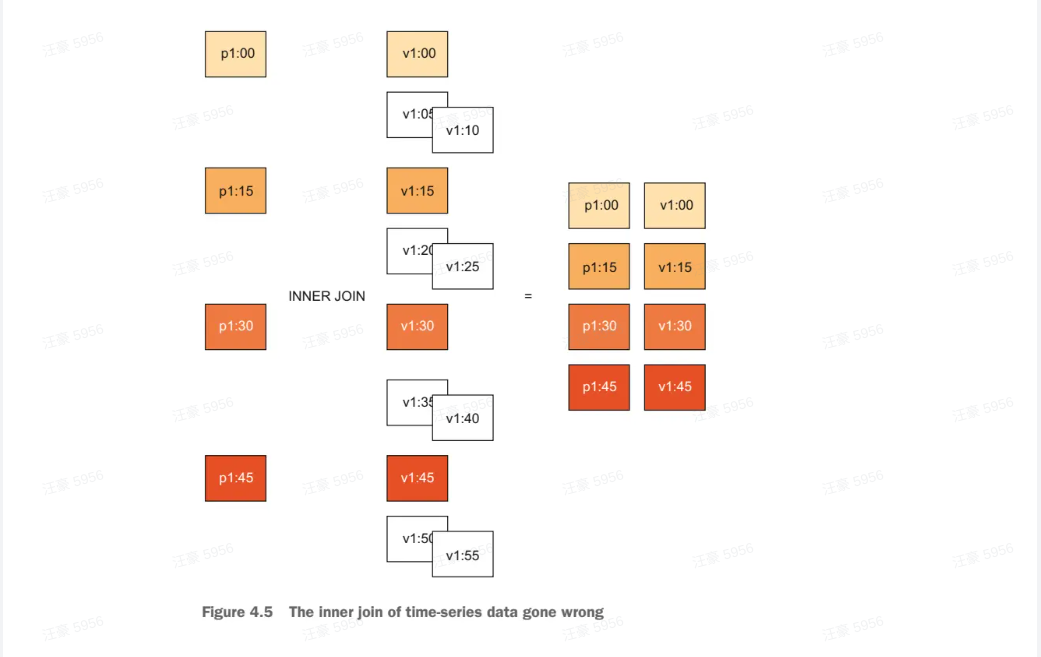

In [201]:
%%sql 
WITH prices AS 
(SELECT 
 range AS valid_at,
 random()*10 AS price
 FROM range('2023-01-01 01:00:00'::timestamp,'2023-01-01 02:00:00'::timestamp, INTERVAL '15 minutes')),
sales AS 
(SELECT range AS sold_at,
 random()*10 AS num
 FROM range('2023-01-01 01:00:00'::timestamp,'2023-01-01 02:00:00'::timestamp, INTERVAL '5 minutes'))
SELECT sold_at, valid_at AS 'with_price_at', round(num * price,2) as price
FROM sales 
JOIN prices ON prices.valid_at = sales.sold_at;

Running query in 'ch03'

sold_at,with_price_at,price
2023-01-01 01:00:00,2023-01-01 01:00:00,29.13
2023-01-01 01:15:00,2023-01-01 01:15:00,16.42
2023-01-01 01:30:00,2023-01-01 01:30:00,0.65
2023-01-01 01:45:00,2023-01-01 01:45:00,0.79


asof join

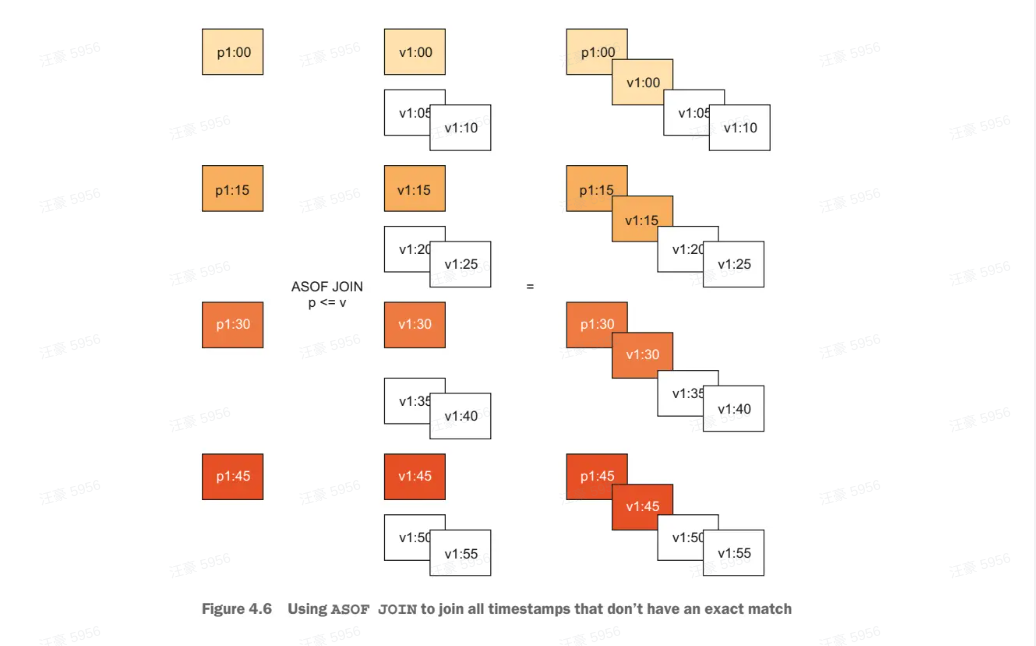

In [ ]:
%%sql
WITH prices AS 
(SELECT range AS valid_at,
 random()*10 AS price
 FROM range('2023-01-01 01:00:00'::timestamp,'2023-01-01 02:00:00'::timestamp, INTERVAL '15 minutes')),
sales AS 
(SELECT range AS sold_at,
 random()*10 AS num
 FROM range('2023-01-01 01:00:00'::timestamp,'2023-01-01 02:00:00'::timestamp, INTERVAL '5 minutes'))
SELECT sold_at, valid_at AS 'with_price_at', round(num * price,2) as price
FROM sales 
ASOF JOIN prices
ON prices.valid_at <= sales.sold_at;

## LATERAL JOIN

The LATERAL keyword allows subqueries in the FROM clause to refer to previous subqueries. This feature is also known as a lateral join.

DuckDB detects when LATERAL joins should be used, making the use of the LATERAL keyword optional.

https://www.heap.io/blog/postgresqls-powerful-new-join-type-lateral  

In [ ]:
%%sql
SELECT *
FROM range(3) t(i), LATERAL (SELECT i + 1) t2(j);

In [ ]:
%%sql
SELECT *
FROM range(3) t(i), (SELECT i + 1) t2(j);

In [ ]:
%%sql

SELECT *
FROM
    generate_series(0, 1) t(i),
    LATERAL (SELECT i + 10 UNION ALL SELECT i + 100) t2(j);

In [ ]:
%%sql
SELECT *
FROM
    generate_series(0, 1) t(i),
    (SELECT i + 10 UNION ALL SELECT i + 100) t2(j);

##  Row Pattern Recognition(window function)

https://www.timescale.com/learn/postgresql-window-functions  
https://www.geeksforgeeks.org/postgre-window-functions/  

https://pgsqlpgpool.blogspot.com/2024/07/row-pattern-recognition-feature-for.html#:~:text=What%20is%20row%20pattern%20recognition,sequence%20of%20rows%20by%20pattern.  
https://www.sraoss.co.jp/wp-content/uploads/files/event_seminar/material/2024/2024-05-29-PGConf.dev-RPR.pdf  
https://medium.com/@lutz.kuenneke89/match-recognize-in-trino-1244ede7c321  
https://modern-sql.com/feature/match_recognize  
https://www.vldb.org/pvldb/vol16/p1181-zhu.pdf  
https://trino.io/blog/2021/05/19/row_pattern_matching.html  